<a href="https://colab.research.google.com/github/jibook/git-remote/blob/master/04_class__regression(%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
sns.get_dataset_names()  # seaborn 이 지원하는 데이터 세트

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
data = sns.load_dataset(name = 'iris')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


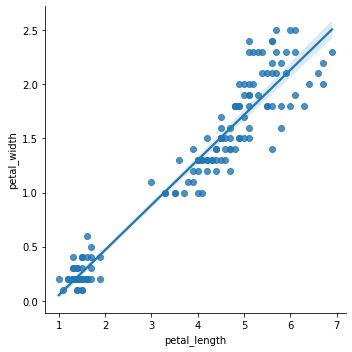

In [6]:
sns.lmplot('petal_length', 'petal_width', data)

In [16]:
X = [157, 160, 160, 168, 172, 175, 175, 177, 182, 184, 188, 190]
y = [42, 48, 54, 48, 63, 69, 71, 73, 70, 80, 79, 81]

print('----------------------------------------------')
print(' Method 1: Statistical Method')
print('----------------------------------------------')
Xmean = sum(X) / len(X)
Ymean = sum(y) / len(y)

print('Xmean', Xmean, "Ymean", Ymean)

----------------------------------------------
 Method 1: Statistical Method
----------------------------------------------
Xmean 174.0 Ymean 64.83333333333333


In [17]:
X = [157, 160, 160, 168, 172, 175, 175, 177, 182, 184, 188, 190]
y = [42, 48, 54, 48, 63, 69, 71, 73, 70, 80, 79, 81]

M1_W=[0.0]
M2_b=[0.0]

total1 = 0
total2 = 0

for i in range(len(X)):
  total1 += (Y[i]-Ymean)*(X[i]-Xmean)
  total2 += pow((X[i]-Xmean),2)

M1_W[0] = total1/total2
M1_b[0] = Ymean - M1_W[0]*Xmean

In [18]:
X = [157, 160, 160, 168, 172, 175, 175, 177, 182, 184, 188, 190]
y = [42, 48, 54, 48, 63, 69, 71, 73, 70, 80, 79, 81]

print('Linear Regression by MEthod 1 : y =', M1_W[0], '* x +', M1_b[0])
print('----------------------------------------------')
print('y           y_hat ')
print('----------------------------------------------')


M1_cost = costfunction(X, y, M1_W, M1_b, 0)

Linear Regression by MEthod 1 : y = 1.160979228486647 * x + -137.17705242334324
----------------------------------------------
y           y_hat 
----------------------------------------------


In [8]:
# cost function
def costfunction(x, y, W, b, iters):
  total = 0.0
  for i in range(len(x)):
    total += pow(W[iters]*x[i] + b[iters]- y[i], 2)
  return total/2

In [10]:
# test set
# X = [-3, -2, -1, 0, 1, 2, 3]
# y = [-3, -2, -1, 0, 1, 2, 3]   # y1
# y = [-2, -1, 0, 1, 2, 3, 4]   # y2

X = [157, 160, 160, 168, 172, 175, 175, 177, 182, 184, 188, 190]
y = [42, 48, 54, 48, 63, 69, 71, 73, 70, 80, 79, 81]

M1_W = [0.0]
M1_b = [0.0]

print('----------------------------------------------')
print(' Method 1: Statistical Method')
print('----------------------------------------------')
Xmean = sum(X) / len(X)
Ymean = sum(y) / len(y)

print('Xmean', Xmean, "Ymean", Ymean)
print('----------------------------------------------')


total1 = 0
total2 = 0

for i in range(len(X)):
  total1 += (Y[i]-Ymean)*(X[i]-Xmean)
  total2 += pow((X[i]-Xmean),2)

M1_W[0] = total1/total2
M1_b[0] = Ymean - M1_W[0]*Xmean
print('Linear Regression by MEthod 1 : y =', M1_W[0], '* x +', M1_b[0])

----------------------------------------------
 Method 1: Statistical Method
----------------------------------------------
Xmean 174.0 Ymean 64.83333333333333
----------------------------------------------
Linear Regression by MEthod 1 : y = 1.160979228486647 * x + -137.17705242334324


In [13]:
import random

In [14]:
print('----------------------------------------------')
print(' Method 2: Statistical Method')
print('----------------------------------------------')

W = [0.0]
b = [0.0]
W[0] = float(random.randint(-100, 100))  ## M1_W[0] 
b[0] = float(random.randint(-100, 100))  ## M1_b[0] 

# This tells us when to stop the algorithm
iters = 0 # iteration counter
cost = costfunction(X, y, W, b, iters)

print('Interation', iters, '|tW[0:', W[0], b[0], '|tcost:', cost)

----------------------------------------------
 Method 2: Statistical Method
----------------------------------------------
Interation 0 |tW[0: -38.0 -45.0 |tcost: 272132011.0


### Gradient

In [20]:
def g_W(X, y, iters):
  total=0.0
  total += W[iters] * X[i] * X[i] + b[iters] * X[i] - X[i] * y[i]
  return total

In [22]:
def g_b(X, y, iters):
  total=0.0
  total += W[iters] * X[i] + b[iters] - y[i]
  return total

In [31]:
X = [157, 160, 160, 168, 172, 175, 175, 177, 182, 184, 188, 190]
y = [42, 48, 54, 48, 63, 69, 71, 73, 70, 80, 79, 81]

rate = 10/cost # Learning rate   ## 0.000001 * cost 
MaxItrs = cost  ## 10000
precision = 0.0001  ## M1_cost * 0.8

while cost > precision: # and iters < MaxItrs:
  iters = iters + 1     # iteration count
  gradientW = g_W(X, y, iters-1)
  gradientB = g_b(X, y, iters-1)
  newW = W[iters-1] - rate * gradientW   # Grad descent
  newb = b[iters-1] - rate * gradientB   # Grad descent
  W.append(newW)
  W.append(newb)

IndexError: ignored

In [29]:
X = [-3, -2, -1, 0, 1, 2, 3]
# y = [-3, -2, -1, 0, 1, 2, 3]   # y1

In [24]:
print('----------------------------------------------')
print(' Method 2: Statistical Method')
print('----------------------------------------------')

W = [0.0]
b = [0.0]
W[0] = float(random.randint(-100, 100))  ## M1_W[0] 
b[0] = float(random.randint(-100, 100))  ## M1_b[0] 

# This tells us when to stop the algorithm
iters = 0 # iteration counter
cost = costfunction(X, y, W, b, iters)

print('Interation', iters, '|tW[0:', W[0], b[0], '|tcost:', cost)

def g_W(X, y, iters):
  total=0.0
  for i in range(len(X)):
    total += W[iters] * X[i] + b[iters] - y[i]
  return total

def g_b(X, y, iters):
  total=0.0
  for i in range(len(X)):
    total += W[iters] * X[i] * X[i] + b[iters] * X[i] - X[i] * y[i]
  return total

rate = 10/cost # Learning rate   ## 0.000001 * cost 
MaxItrs = cost  ## 10000
precision = 0.0001  ## M1_cost * 0.8

while cost > precision: # and iters < MaxItrs:
  iters = iters + 1     # iteration count
  gradientW = g_W(X, y, iters-1)
  gradientB = g_b(X, y, iters-1)
  newW = W[iters-1] - rate * gradientW   # Grad descent
  newb = b[iters-1] - rate * gradientB   # Grad descent
  W.append(newW)
  b.append(newb)
  cost = costfunction(X, y, W, b, iters)


  if iters %100==0:   # 동아리 키-몸무게 사례는 1000000로 설정
    print('iteration:', iters, end=',')
    print('gradient W: %.1f, gradient b: %.1f, ' % (gradientW, gradientB), end= ' ')
    print('W[ %d ]:%.1f, b[%d]:%.1f, cost:%.1f' % (iters, W[iters], iters, b[iters], cost))
    ans = input()
    if ans =='q':
      break

----------------------------------------------
 Method 2: Statistical Method
----------------------------------------------
Interation 0 |tW[0: 15.0 -66.0 |tcost: 37006804.0
iteration: 100,gradient W: 26598.2, gradient b: 4645724.8,  W[ 100 ]:14.2, b[100]:-198.8, cost:29526442.5
10000
iteration: 200,gradient W: 23753.1, gradient b: 4149764.8,  W[ 200 ]:13.6, b[200]:-317.5, cost:23559373.5
1000
iteration: 300,gradient W: 21212.1, gradient b: 3706803.5,  W[ 300 ]:13.0, b[300]:-423.4, cost:18799455.1
1000
iteration: 400,gradient W: 18942.6, gradient b: 3311177.2,  W[ 400 ]:12.4, b[400]:-518.1, cost:15002478.4
10000
iteration: 500,gradient W: 16915.6, gradient b: 2957827.9,  W[ 500 ]:11.9, b[500]:-602.7, cost:11973638.5
q


In [25]:
X = [157, 160, 160, 168, 172, 175, 175, 177, 182, 184, 188, 190]
y = [42, 48, 54, 48, 63, 69, 71, 73, 70, 80, 79, 81]

In [26]:
print('----------------------------------------------')
print(' Method 2: Statistical Method')
print('----------------------------------------------')

W = [0.0]
b = [0.0]
W[0] = float(random.randint(-100, 100))  ## M1_W[0] 
b[0] = float(random.randint(-100, 100))  ## M1_b[0] 

# This tells us when to stop the algorithm
iters = 0 # iteration counter
cost = costfunction(X, y, W, b, iters)

print('Interation', iters, '|tW[0:', W[0], b[0], '|tcost:', cost)

def g_W(X, y, iters):
  total=0.0
  for i in range(len(X)):
    total += W[iters] * X[i] + b[iters] - y[i]
  return total

def g_b(X, y, iters):
  total=0.0
  for i in range(len(X)):
    total += W[iters] * X[i] * X[i] + b[iters] * X[i] - X[i] * y[i]
  return total

rate = 10/cost # Learning rate   ## 0.000001 * cost 
MaxItrs = cost  ## 10000
precision = 0.0001  ## M1_cost * 0.8

while cost > precision: # and iters < MaxItrs:
  iters = iters + 1     # iteration count
  gradientW = g_W(X, y, iters-1)
  gradientB = g_b(X, y, iters-1)
  newW = W[iters-1] - rate * gradientW   # Grad descent
  newb = b[iters-1] - rate * gradientB   # Grad descent
  W.append(newW)
  b.append(newb)
  cost = costfunction(X, y, W, b, iters)


  if iters %1000000==0:   # 동아리 키-몸무게 사례는 1000000로 설정
    print('iteration:', iters, end=',')
    print('gradient W: %.1f, gradient b: %.1f, ' % (gradientW, gradientB), end= ' ')
    print('W[ %d ]:%.1f, b[%d]:%.1f, cost:%.1f' % (iters, W[iters], iters, b[iters], cost))
    ans = input()
    if ans =='q':
      break

----------------------------------------------
 Method 2: Statistical Method
----------------------------------------------
Interation 0 |tW[0: -74.0 100.0 |tcost: 993129663.0
iteration: 1000000,gradient W: 154.0, gradient b: -26837.3,  W[ 1000000 ]:-38.6, b[1000000]:6797.6, cost:1067734.6
100000
iteration: 2000000,gradient W: 160.1, gradient b: -27903.7,  W[ 2000000 ]:-40.2, b[2000000]:7073.1, cost:1154267.6
q


### scikit-learn 사용한 선형회귀

1. 자료준비 및 데이터 분포보기

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


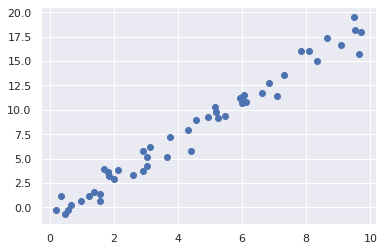

In [33]:
sns.set()
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x -1 + rng.randn(50)
plt.scatter(x, y)

2. 모듈 import

In [34]:
from sklearn.linear_model import LinearRegression

3. 모델 인스턴스화

In [35]:
model = LinearRegression(fit_intercept= True)

In [36]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

4. 데이터를 특징과 대상 벡터로 배치

In [37]:
X = x[:, np.newaxis]

In [38]:
x.shape

(50,)

In [39]:
X.shape

(50, 1)

5. 주어진 데이터로 모델을 학습시키기

In [40]:
model.fit(X,y)

LinearRegression()

6. 결과확인

In [41]:
model.coef_

array([1.9776566])

In [42]:
model.intercept_

-0.9033107255311146

7. 학습된 모델로 새로운 데이터에 레이블 예측하기

In [43]:
xfit = np.linspace(-1, 11)

In [46]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

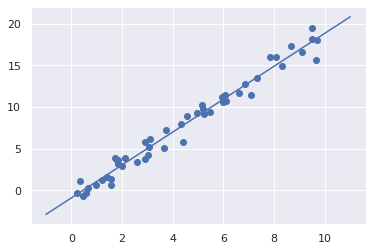

In [47]:
plt.scatter(x,y)
plt.plot(xfit, yfit)

* iris 데이터에 적용하기 (데이터와 회귀를 한 번에 보임)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


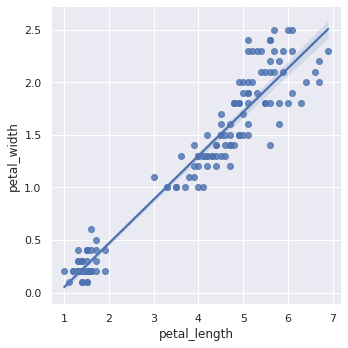

In [48]:
sns.lmplot('petal_length', 'petal_width', data)